In [121]:
### Extract files from the zip files

import os
import zipfile
import shutil

files_folder = 'Data_zipped' # Folder containing all the .zip files

# Remove the existing /Data folder and create a new one
if os.path.exists('Data'):
    shutil.rmtree('Data')
os.makedirs('Data', exist_ok=True)

# Unzip all .zip files in /Data_zipped into /Data
for foldername, subfolders, filenames in os.walk(files_folder):
    for filename in filenames:
        if filename.endswith('.zip'):
            zip_file = zipfile.ZipFile(os.path.join(foldername, filename))
            # Extract only the "Output" in that .zip file
            run_name = filename.split('_')[0].split('Run')[1]
            zip_file.extractall(f'Data/{run_name}')
            zip_file.close()
            print(f'{filename} unzipped to /Data/{run_name}')
print('All .zip files unzipped to /Data')


Run6_1213Outputs.zip unzipped to /Data/6
Run7_1213Outputs.zip unzipped to /Data/7
Run3_1213Outputs.zip unzipped to /Data/3
Run5_1213Outputs.zip unzipped to /Data/5
Run8_1213Outputs.zip unzipped to /Data/8
Run2_1213Outputs.zip unzipped to /Data/2
Run4_1213Outputs.zip unzipped to /Data/4
Run1_1213Outputs.zip unzipped to /Data/1
All .zip files unzipped to /Data


In [143]:
### Extract the data into a python dictionary

run_name = 2
path_gan_cell_resp = f'Data/{run_name}/Outputs/Responses/Gan_Cell_Responses'
t_csv = f'Data/{run_name}/Outputs/Responses/t.csv'

# Load the t.csv file into an numpy array
import numpy as np
t = np.loadtxt(t_csv, delimiter=',')

# Load the GAN cell responses into a numpy array
# List all files in path_gan_cell_resp
import os
gan_cell_files = os.listdir(path_gan_cell_resp)
gan_cell_files.sort()
gan_cell_odd_coord = []
gan_cell_even_coord = []
for file in gan_cell_files:
    if file.endswith('.csv'):
        # if file name has "even"
        if 'even' in file:
            coord = file.split('_')[1].split('even')[1].split('.')[0]
            gan_cell_even_coord.append(coord)
        else:
            coord = file.split('_')[1].split('odd')[1].split('.')[0]
            gan_cell_odd_coord.append(coord)

# Load the GAN cell responses into a numpy array
gan_cell_odd_resp = {}
gan_cell_even_resp = {}
for coord in gan_cell_odd_coord:
    if os.path.getsize(f'{path_gan_cell_resp}/Gan_Cellodd{coord}.csv') == 0:
        gan_cell_odd_coord.remove(coord)
        print (f'odd{coord} is empty, removing from list')
    else:
        gan_cell_odd_resp[coord] = np.loadtxt(f'{path_gan_cell_resp}/Gan_Cellodd{coord}.csv', delimiter=',')
for coord in gan_cell_even_coord:
    if os.path.getsize(f'{path_gan_cell_resp}/Gan_Celleven{coord}.csv') == 0:
        gan_cell_even_coord.remove(coord)
        print (f'even{coord} is empty, removing from list')
    else:
        gan_cell_even_resp[coord] = np.loadtxt(f'{path_gan_cell_resp}/Gan_Celleven{coord}.csv', delimiter=',')

odd04 is empty, removing from list
odd14 is empty, removing from list
odd24 is empty, removing from list
odd34 is empty, removing from list
odd41 is empty, removing from list
odd43 is empty, removing from list
even03 is empty, removing from list
even13 is empty, removing from list
even23 is empty, removing from list
even33 is empty, removing from list
even43 is empty, removing from list
even51 is empty, removing from list
even53 is empty, removing from list


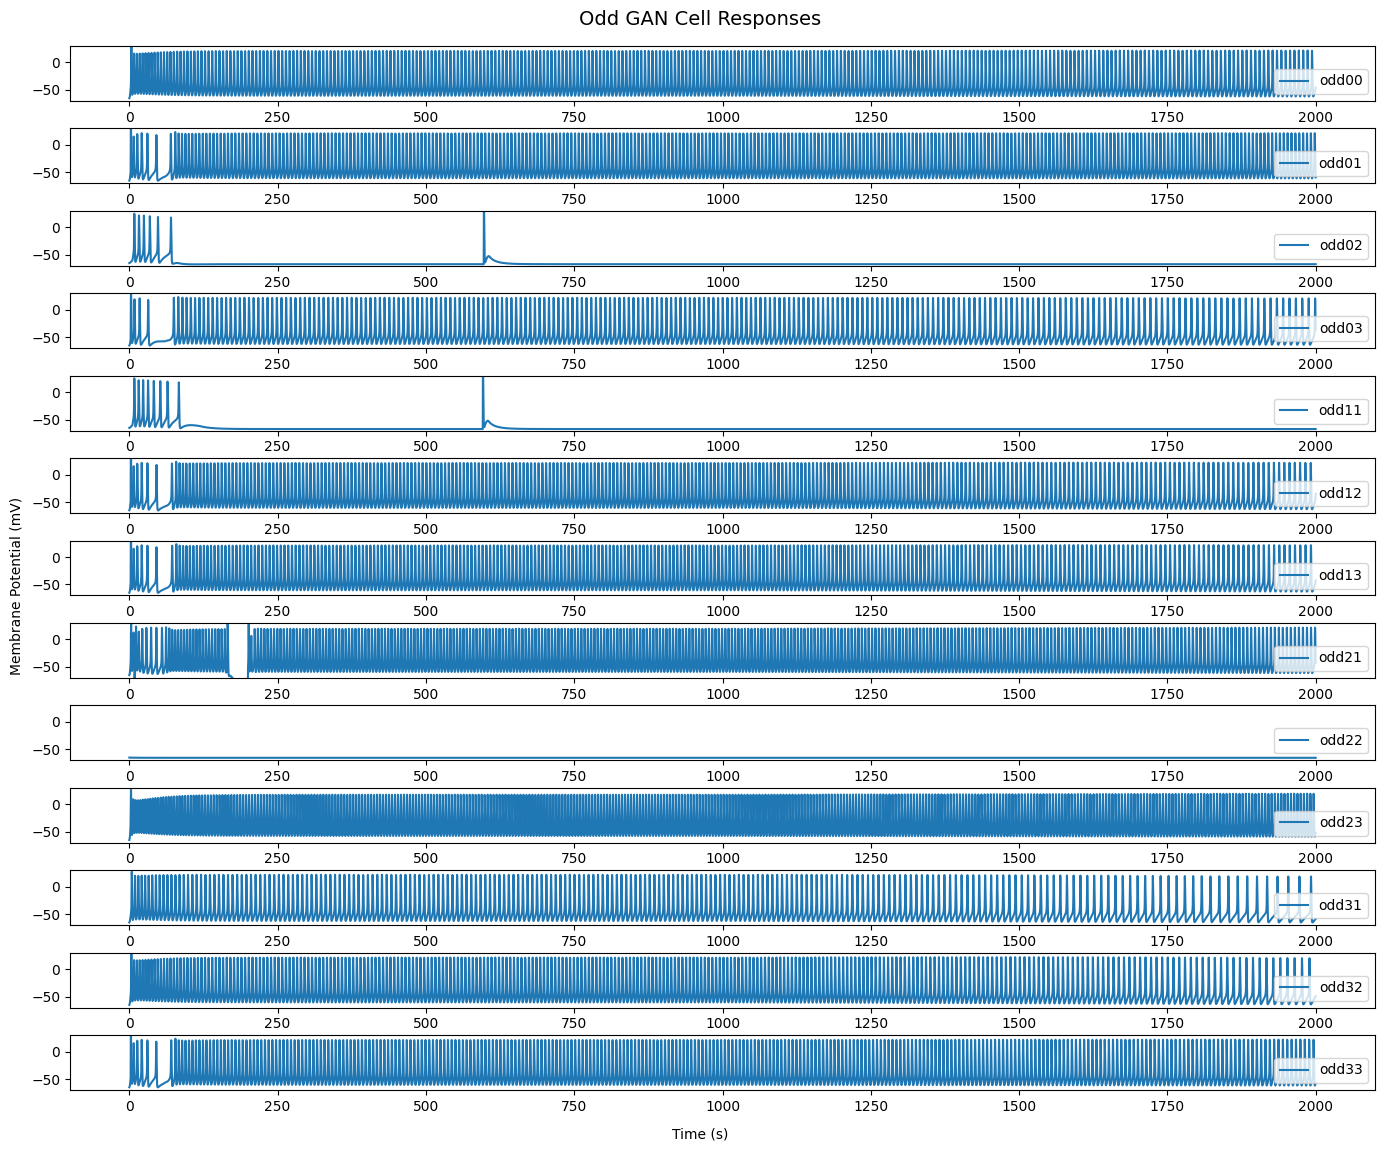

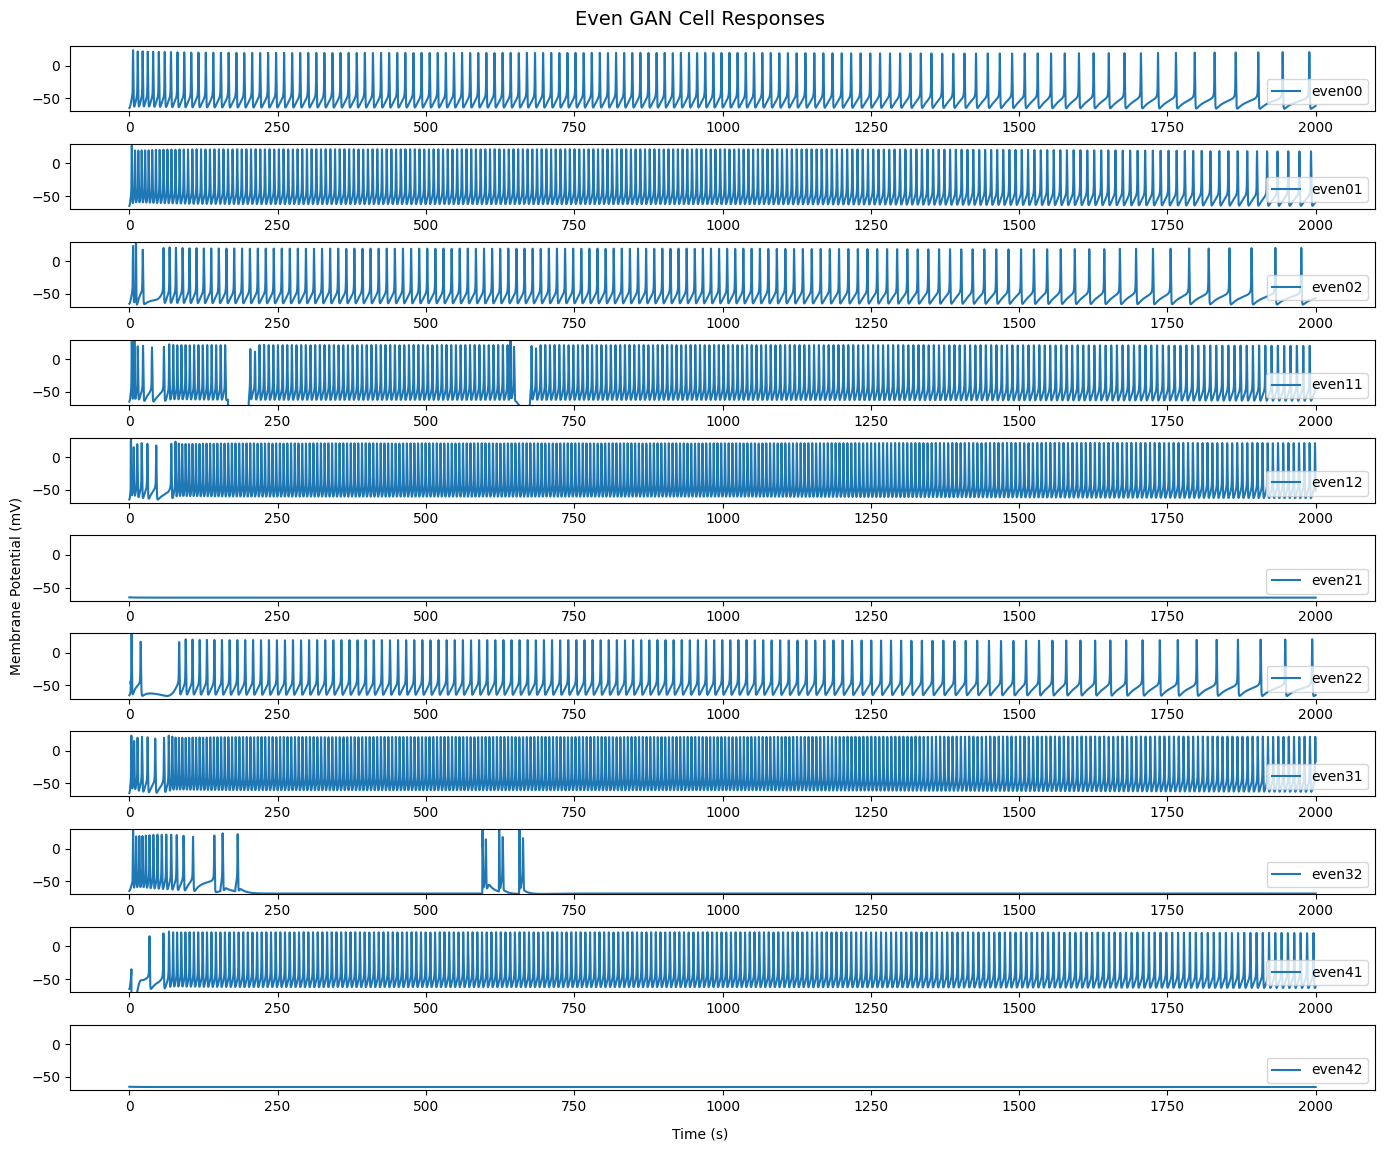

In [144]:
### Plot all the GAN cell responses

import matplotlib.pyplot as plt
N_plot = len(gan_cell_odd_resp.keys())
fig, axes = plt.subplots(N_plot, 1, figsize=(15, 12))
fig.suptitle('Odd GAN Cell Responses', fontsize=14)
fig.text(0.5, 0.04, 'Time (s)', ha='center')
fig.text(0.04, 0.5, 'Membrane Potential (mV)', va='center', rotation='vertical')
# Index using keys
for coord_i in range(N_plot):
    coord = list(gan_cell_odd_resp.keys())[coord_i]
    ax = axes[coord_i]
    ax.plot(t, gan_cell_odd_resp[coord], label=f'odd{coord}')
    ax.set_ylim([-70,30])
    ax.legend(loc='lower right')
# plt.tight_layout()
fig.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.08, hspace=0.5)
plt.savefig(f'Run{run_name}_Odd_GAN_Cell_Responses.png', dpi=300)

# Do the same for Even GAN Cell Responses
N_plot = len(gan_cell_even_resp.keys())
fig, axes = plt.subplots(N_plot, 1, figsize=(15, 12))
fig.suptitle('Even GAN Cell Responses', fontsize=14)
fig.text(0.5, 0.04, 'Time (s)', ha='center')
fig.text(0.04, 0.5, 'Membrane Potential (mV)', va='center', rotation='vertical')
# Index using keys
for coord_i in range(N_plot):
    coord = list(gan_cell_even_resp.keys())[coord_i]
    ax = axes[coord_i]
    ax.plot(t, gan_cell_even_resp[coord], label=f'even{coord}')
    ax.set_ylim([-70,30])
    ax.legend(loc='lower right')
# plt.tight_layout()
fig.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.08, hspace=0.5)
plt.savefig(f'Run{run_name}_Even_GAN_Cell_Responses.png', dpi=300)



Average base period of odd00 = 6.307594936708861
Average base period of odd01 = 6.3075949367088615
No spike detected for odd02
Average base period of odd03 = 7.918749999999999
No spike detected for odd11
Average base period of odd12 = 6.307499999999999
Average base period of odd13 = 6.3075
Average base period of odd21 = 5.5175824175824175
No spike detected for odd22
Average base period of odd23 = 5.036363636363636
Average base period of odd31 = 7.9190476190476184
Average base period of odd32 = 6.307594936708861
Average base period of odd33 = 6.307594936708861
Average base period of even00 = 13.662162162162161
Average base period of even01 = 7.9190476190476184
Average base period of even02 = 13.662162162162161
Average base period of even11 = 8.173770491803278
Average base period of even12 = 6.307594936708861
No spike detected for even21
Average base period of even22 = 13.664864864864864
Average base period of even31 = 6.307594936708861
Average base period of even32 = 80.16666666666667
A

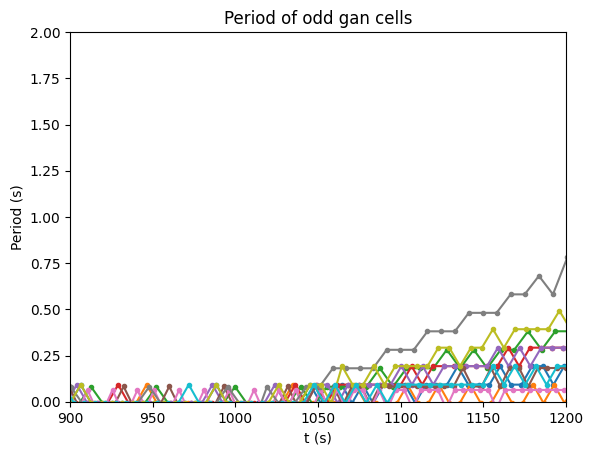

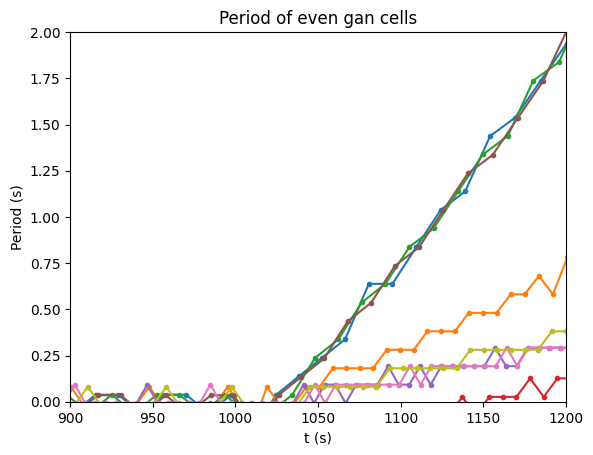

In [146]:

vth = -25
# Measure cycle-by-cycle frequency
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
for coord in gan_cell_odd_resp.keys():
    y = gan_cell_odd_resp[coord].copy()
    x = t.copy()
    cross = np.where(np.logical_and(y[:-1] < vth, y[1:] >= vth))[0]
    # skip if no spike detected
    if len(cross) <10:
        print(f'No spike detected for odd{coord}')
        continue
    cross_time = x[cross]
    period = cross_time[1:] - cross_time[:-1]
    # get average from t = 500 to t = 1000
    avg_period = np.mean(period[np.logical_and(cross_time[1:] > 500, cross_time[1:] < 1000)])
    print(f'Average base period of odd{coord} = {avg_period}')
    plt.plot(cross_time[1:],((period)-avg_period), '.-',label=f'odd{coord}')

plt.title(f'Period of odd gan cells')
plt.xlabel('t (s)')
plt.ylabel('Period (s)')
# plt.yscale('log')
plt.ylim([0,2])
plt.xlim([900,1200])
plt.savefig(f'Run{run_name}_period_of_odd_gan_cells.png', dpi=300)


# Do the same for even gan cells
plt.figure()
for coord in gan_cell_even_resp.keys():
    y = gan_cell_even_resp[coord].copy()
    x = t.copy()
    cross = np.where(np.logical_and(y[:-1] < vth, y[1:] >= vth))[0]
    # skip if no spike detected
    if len(cross) <10:
        print(f'No spike detected for even{coord}')
        continue
    cross_time = x[cross]
    period = cross_time[1:] - cross_time[:-1]
    # get average from t = 500 to t = 1000
    avg_period = np.mean(period[np.logical_and(cross_time[1:] > 500, cross_time[1:] < 1000)])
    print(f'Average base period of even{coord} = {avg_period}')
    plt.plot(cross_time[1:],((period)-avg_period), '.-',label=f'even{coord}')

plt.title(f'Period of even gan cells')
plt.xlabel('t (s)')
plt.ylabel('Period (s)')
plt.ylim([0,2])
plt.xlim([900,1200])
plt.savefig(f'Run{run_name}_period_of_even_gan_cells.png', dpi=300)


FFT of odd02 is discarded
FFT of odd11 is discarded
FFT of odd22 is discarded


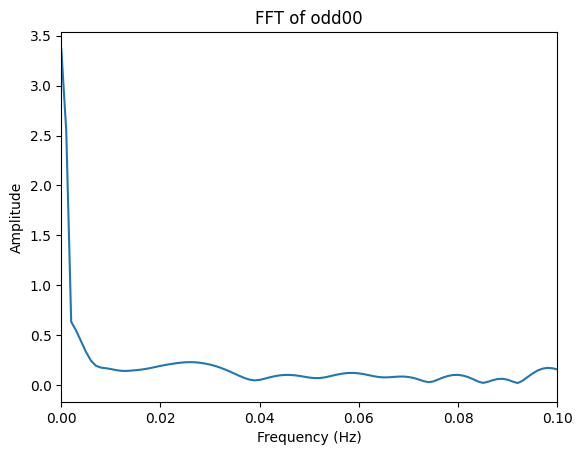

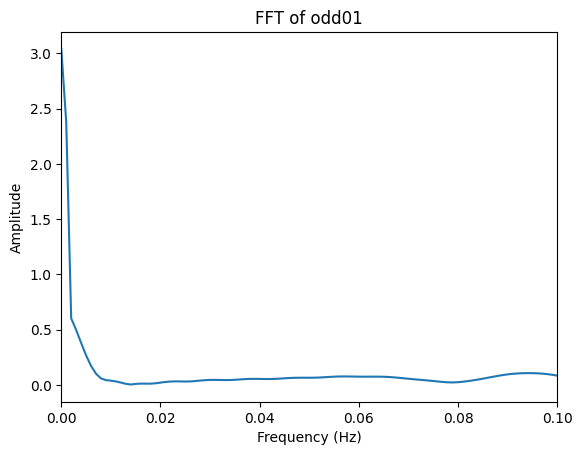

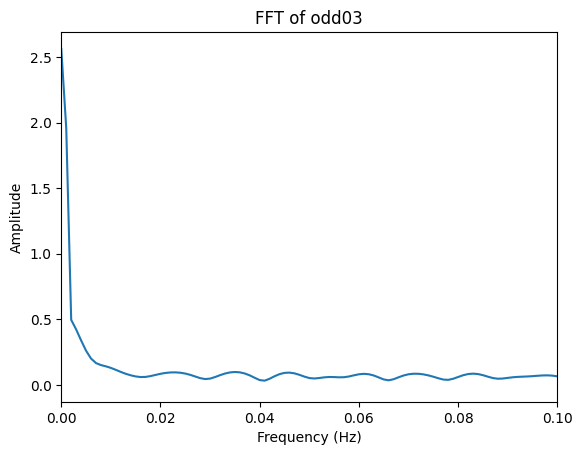

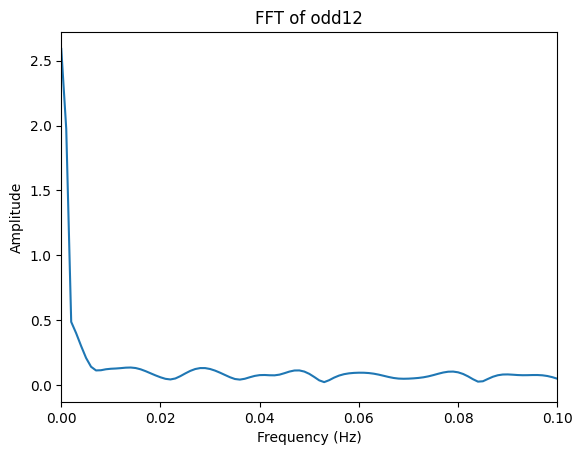

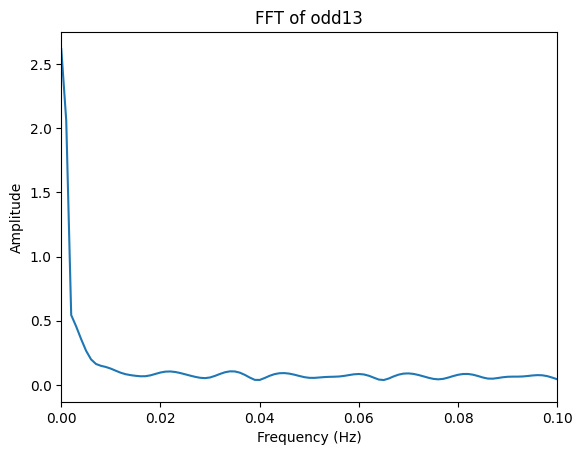

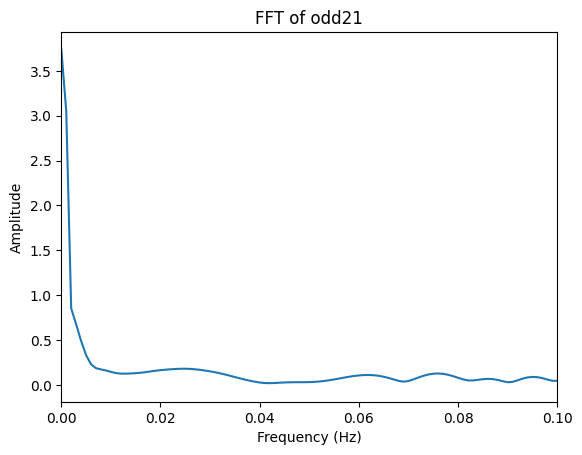

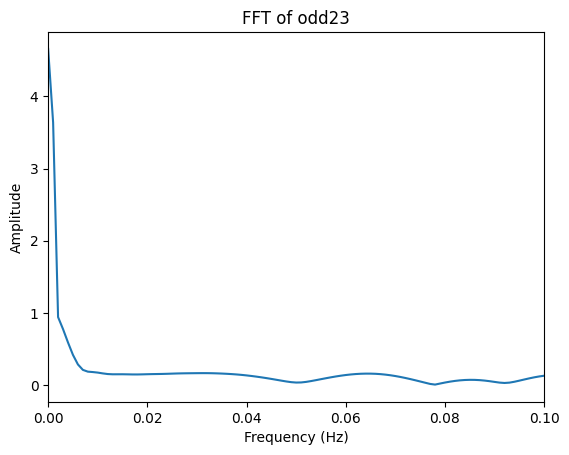

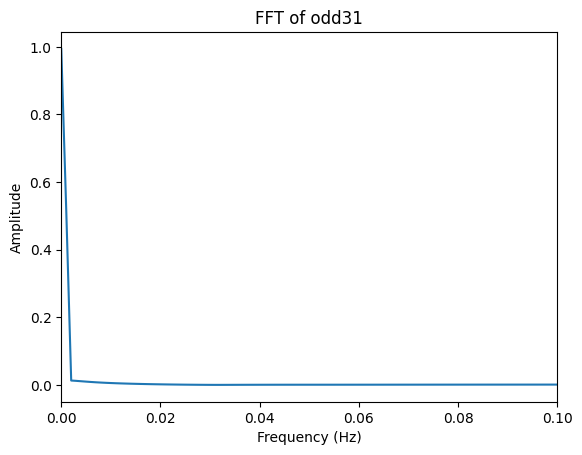

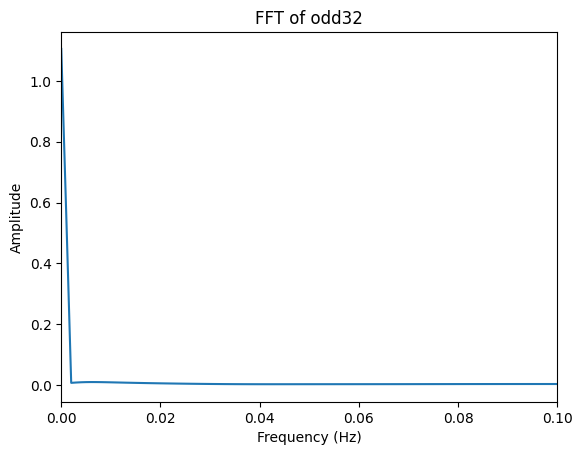

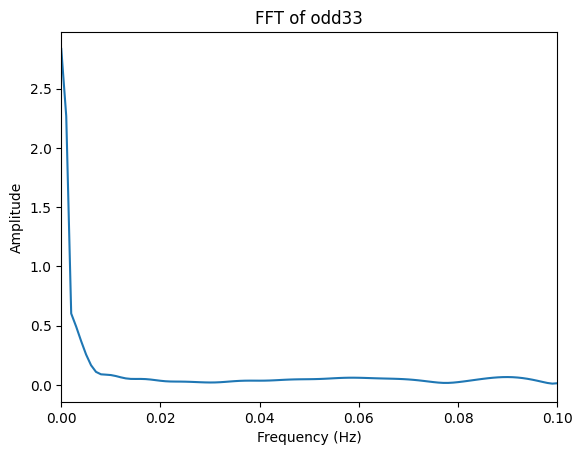

In [142]:

for coord in gan_cell_odd_resp.keys():
    y = gan_cell_odd_resp[coord].copy()
    x = t.copy()
    # Take the points after t = 1000s
    y = y[x > 1000]
    # Remove DC from y
    y = y - np.mean(y)
    x = x[x > 1000]
    # Apply windowing
    y = y * np.hanning(len(y))
    
    # Do fft
    yf = np.fft.fft(y)
    N = len(y)
    xf = np.fft.fftfreq(N, d=x[1]-x[0])

    # Discard FFT if the average amplitude is less than 0.1
    if np.mean(np.abs(yf)) < 0.1:
        print(f'FFT of odd{coord} is discarded')
        continue
    plt.figure()
    plt.plot(xf[:N//2], 2.0/N * np.abs(yf[:N//2]))
    plt.title(f'FFT of odd{coord}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim([0, 0.1])
    plt.savefig(f'Run{run_name}_FFT_odd{coord}.png', dpi=300)
